In [1]:
read.load = function(file = 'train.csv'){
  ## Read the csv file
  housingDataTrain <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
 # housingDataTrain[complete.cases(housingDataTrain), ]
}
housingDataTrain = read.load()
#head(housingDataTrain)



In [2]:
ncol(housingDataTrain)

[1] 292

In [5]:
dim(housingDataTrain)

[1] 30471   292

In [3]:
str(housingDataTrain)

'data.frame':	6042 obs. of  292 variables:
 $ id                                   : int  8059 8157 8290 8390 8394 8413 8426 8430 8455 8473 ...
 $ timestamp                            : chr  "2013-05-21" "2013-05-27" "2013-06-03" "2013-06-07" ...
 $ full_sq                              : int  11 45 77 56 31 43 46 45 38 54 ...
 $ life_sq                              : int  11 27 50 29 21 27 29 29 24 32 ...
 $ floor                                : int  2 6 3 5 5 1 9 2 4 7 ...
 $ max_floor                            : int  5 9 5 16 9 5 9 9 9 17 ...
 $ material                             : int  2 1 2 5 5 2 2 1 2 1 ...
 $ build_year                           : int  1907 1970 1957 1987 1962 1960 1969 1972 1965 2010 ...
 $ num_room                             : int  1 2 3 2 1 2 2 2 2 2 ...
 $ kitch_sq                             : int  12 6 8 10 5 5 5 6 5 9 ...
 $ state                                : int  3 3 2 2 3 2 3 3 2 3 ...
 $ product_type                         : chr  "Investment" 

In [3]:
# replace NAs by median
library( plyr)
medn_replace <- function(x) {
  replace_value <- median(x, na.rm = T)
  x[is.na(x)] <- replace_value
  return(x)
  }
  
numeric_data <- numcolwise (medn_replace)(housingDataTrain)
sum(is.na(numeric_data))
dim(numeric_data)

Warning message:
"package 'plyr' was built under R version 3.3.2"

[1] 0

[1] 30471   276

In [4]:
# function to identify which columns are character
library( dplyr)
character_cols <- function(x){
  ifelse(is.character(x) == 1 | is.factor(x) == 1, 1, 0)
}

cat_idx <- colwise(character_cols)(housingDataTrain)
# separating character data
cat_data <- housingDataTrain %>% select(
  which(cat_idx[,] == 1)
)

dim(cat_data)
dim(numeric_data)
dim(housingDataTrain)

Warning message:
"package 'dplyr' was built under R version 3.3.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 30471    16

[1] 30471   276

[1] 30471   292

In [5]:
sum(is.na(housingDataTrain))
housingDataTrain

[1] 261026

id    timestamp  full_sq life_sq floor max_floor material build_year
1      1    2011-08-20 43      27       4    NA        NA       NA        
2      2    2011-08-23 34      19       3    NA        NA       NA        
3      3    2011-08-27 43      29       2    NA        NA       NA        
4      4    2011-09-01 89      50       9    NA        NA       NA        
5      5    2011-09-05 77      77       4    NA        NA       NA        
6      6    2011-09-06 67      46      14    NA        NA       NA        
7      7    2011-09-08 25      14      10    NA        NA       NA        
8      8    2011-09-09 44      44       5    NA        NA       NA        
9      9    2011-09-10 42      27       5    NA        NA       NA        
10    10    2011-09-13 36      21       9    NA        NA       NA        
11    11    2011-09-16 36      19      12    NA        NA       NA        
12    12    2011-09-16 38      19      11    NA        NA       NA        
13    13    2011-09-17 43      28       4    NA        NA       NA        
14    14    2011-09-19 31      31       4    NA        NA       NA        
15    15    2011-09-19 31      21       3    NA        NA       NA        
16    16    2011-09-20 51      31      15    NA        NA       NA        
17    17    2011-09-20 47      31       4    NA        NA       NA        
18    18    2011-09-20 42      28       2    NA        NA       NA        
19    19    2011-09-22 59      33      10    NA        NA       NA        
20    20    2011-09-22 44      29       4    NA        NA       NA        
21    21    2011-09-22 74      44      10    NA        NA       NA        
22    22    2011-09-22 39      39       7    NA        NA       NA        
23    23    2011-09-23 48      34       6    NA        NA       NA        
24    24    2011-09-23 32      18       3    NA        NA       NA        
25    25    2011-09-23 34      19      11    NA        NA       NA        
26    26    2011-09-24 45      29       9    NA        NA       NA        
27    27    2011-09-26 35      20       4    NA        NA       NA        
28    28    2011-09-26 38      20       6    NA        NA       NA        
29    29    2011-09-26 73      38      15    NA        NA       NA        
30    30    2011-09-27 42      27       3    NA        NA       NA        
...   ...   ...        ...     ...     ...   ...       ...      ...       
30442 30444 2015-06-27 113      1      26    26        1        2015      
30443 30445 2015-06-27  40     40       2    12        4        2015      
30444 30446 2015-06-27  79     NA      17    17        1          NA      
30445 30447 2015-06-27  85     NA      20    25        4        2016      
30446 30448 2015-06-27  47     47      19    25        1        2016      
30447 30449 2015-06-27  82     82       8     8        6        2017      
30448 30450 2015-06-27  64     NA      15    17        1          NA      
30449 30451 2015-06-27  74     NA       8    17        1          NA      
30450 30452 2015-06-27  47     47       7    25        1        2015      
30451 30453 2015-06-29  65     NA       5     0        1          NA      
30452 30454 2015-06-29  37     NA       3     3        1           0      
30453 30455 2015-06-29  38     19       7    17        1        2006      
30454 30456 2015-06-29  45      1       6    15        6        2015      
30455 30457 2015-06-29  40     26       3     9        2        1972      
30456 30458 2015-06-29  79     79       3     3        1          NA      
30457 30459 2015-06-29  52     30       8    14        1        1992      
30458 30460 2015-06-29  58     43       7     9        1        1979      
30459 30461 2015-06-29  50      1       7     7        1        2015      
30460 30462 2015-06-29  51     NA       4    17        4          NA      
30461 30463 2015-06-29  54     32       8    16        1        1979      
30462 30464 2015-06-30  36     19       5    16        1        1980      
30463 30465 2015-06-30  47     

In [6]:
numeric_data

id    full_sq life_sq floor max_floor material build_year num_room
1      1    43      27       4    12        1        1979       2       
2      2    34      19       3    12        1        1979       2       
3      3    43      29       2    12        1        1979       2       
4      4    89      50       9    12        1        1979       2       
5      5    77      77       4    12        1        1979       2       
6      6    67      46      14    12        1        1979       2       
7      7    25      14      10    12        1        1979       2       
8      8    44      44       5    12        1        1979       2       
9      9    42      27       5    12        1        1979       2       
10    10    36      21       9    12        1        1979       2       
11    11    36      19      12    12        1        1979       2       
12    12    38      19      11    12        1        1979       2       
13    13    43      28       4    12        1        1979       2       
14    14    31      31       4    12        1        1979       2       
15    15    31      21       3    12        1        1979       2       
16    16    51      31      15    12        1        1979       2       
17    17    47      31       4    12        1        1979       2       
18    18    42      28       2    12        1        1979       2       
19    19    59      33      10    12        1        1979       2       
20    20    44      29       4    12        1        1979       2       
21    21    74      44      10    12        1        1979       2       
22    22    39      39       7    12        1        1979       2       
23    23    48      34       6    12        1        1979       2       
24    24    32      18       3    12        1        1979       2       
25    25    34      19      11    12        1        1979       2       
26    26    45      29       9    12        1        1979       2       
27    27    35      20       4    12        1        1979       2       
28    28    38      20       6    12        1        1979       2       
29    29    73      38      15    12        1        1979       2       
30    30    42      27       3    12        1        1979       2       
...   ...   ...     ...     ...   ...       ...      ...        ...     
30442 30444 113      1      26    26        1        2015       4       
30443 30445  40     40       2    12        4        2015       1       
30444 30446  79     30      17    17        1        1979       3       
30445 30447  85     30      20    25        4        2016       3       
30446 30448  47     47      19    25        1        2016       1       
30447 30449  82     82       8     8        6        2017       2       
30448 30450  64     30      15    17        1        1979       2       
30449 30451  74     30       8    17        1        1979       3       
30450 30452  47     47       7    25        1        2015       1       
30451 30453  65     30       5     0        1        1979       2       
30452 30454  37     30       3     3        1           0       1       
30453 30455  38     19       7    17        1        2006       1       
30454 30456  45      1       6    15        6        2015       1       
30455 30457  40     26       3     9        2        1972       2       
30456 30458  79     79       3     3        1        1979       3       
30457 30459  52     30       8    14        1        1992       2       
30458 30460  58     43       7     9        1        1979       3       
30459 30461  50      1       7     7        1        2015       1       
30460 30462  51     30       4    17        4        1979       2       
30461 30463  54     32       8    16        1        1979       2       
30462 30464  36     19       5    16        1        1980       1       
30463 30465  47     30      23    25        4        2016       1       
30464 30466  56     29      13    14        1        2001       

In [7]:
final_data <- bind_cols(numeric_data,
                        cat_data)
dim(final_data)

[1] 30471   292

In [29]:
#full_sq$final_data
summary(final_data$full_sq)
#TODO Remove outliers

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   38.00   49.00   54.21   63.00 5326.00 

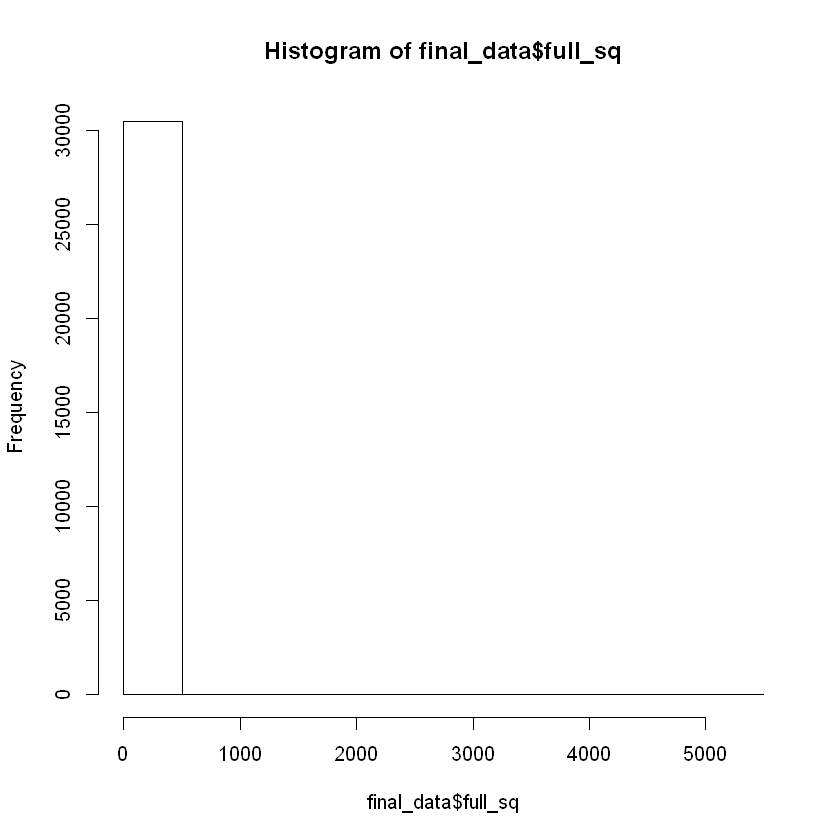

In [30]:
hist(final_data$full_sq)

### Remove Redundant Features

In [34]:
# ensure the results are repeatable
set.seed(7)
# load the library
library(mlbench)
library(caret)
# load the data
#data(final_data)
# calculate correlation matrix
correlationMatrix <- cor(numeric_data)
# summarize the correlation matrix
print(correlationMatrix)
# find attributes that are highly corrected (ideally >0.75)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
# print indexes of highly correlated attributes
print(highlyCorrelated)

                                                 id       full_sq       life_sq
id                                     1.0000000000  0.0214471813  0.0119189621
full_sq                                0.0214471813  1.0000000000  0.1514063427
life_sq                                0.0119189621  0.1514063427  1.0000000000
floor                                 -0.0210957419  0.0890848344  0.0323373294
max_floor                              0.0411553706  0.0576497937  0.0334129674
material                               0.2441930402  0.0171681541  0.0140492380
build_year                            -0.0036881855 -0.0026323607 -0.0022285973
num_room                              -0.0393301293  0.3337612380  0.1707462556
kitch_sq                               0.0004149052  0.0096945556  0.0034082236
state                                 -0.0097766627 -0.0391388976 -0.0487175108
area_m                                 0.0635721274  0.0563025727  0.0304470101
raion_popul                           -0

In [ ]:
library(Boruta)
# Decide if a variable is important or not using Boruta
boruta_output <- Boruta(price_doc ~ ., data=na.omit(final_data), doTrace=2)  
# perform Boruta search
# Confirmed 10 attributes: Humidity, Inversion_base_height, Inversion_temperature, Month, Pressure_gradient and 5 more.
# Rejected 3 attributes: Day_of_month, Day_of_week, Wind_speed.
boruta_signif <- names(boruta_output$finalDecision[boruta_output$finalDecision %in% c("Confirmed", "Tentative")])
# collect Confirmed and Tentative variables
print(boruta_signif)  # significant variables
#=> [1] "Month"                 "ozone_reading"         "pressure_height"      
#=> [4] "Humidity"              "Temperature_Sandburg"  "Temperature_ElMonte"  
#=> [7] "Inversion_base_height" "Pressure_gradient"     "Inversion_temperature"
#=> [10] "Visibility"
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  # plot variable importance


Warning message:
"package 'Boruta' was built under R version 3.3.3"Loading required package: ranger
Warning message:
"package 'ranger' was built under R version 3.3.3" 1. run of importance source...


Growing trees.. Progress: 16%. Estimated remaining time: 2 minutes, 45 seconds.
Growing trees.. Progress: 29%. Estimated remaining time: 2 minutes, 31 seconds.
Growing trees.. Progress: 43%. Estimated remaining time: 2 minutes, 3 seconds.
Growing trees.. Progress: 56%. Estimated remaining time: 1 minute, 39 seconds.
Growing trees.. Progress: 70%. Estimated remaining time: 1 minute, 7 seconds.
Growing trees.. Progress: 83%. Estimated remaining time: 38 seconds.
Growing trees.. Progress: 94%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 1%. Estimated remaining time: 1 hour, 2 minutes, 42 seconds.
Computing permutation importance.. Progress: 3%. Estimated remaining time: 51 minutes, 11 seconds.
Computing permutation importance.. Progress: 4%. Estimated remaining time: 45 minutes, 37 seconds.
Computing permutation importance.. Progress: 6%. Estimated remaining time: 41 minutes, 41 seconds.
Computing permutation importance.. Progress: 7%. Estimated rema

 2. run of importance source...


Growing trees.. Progress: 14%. Estimated remaining time: 3 minutes, 13 seconds.
Growing trees.. Progress: 28%. Estimated remaining time: 2 minutes, 39 seconds.
Growing trees.. Progress: 41%. Estimated remaining time: 2 minutes, 13 seconds.
Growing trees.. Progress: 55%. Estimated remaining time: 1 minute, 43 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 1 minute, 12 seconds.
Growing trees.. Progress: 82%. Estimated remaining time: 41 seconds.
Growing trees.. Progress: 95%. Estimated remaining time: 10 seconds.
Computing permutation importance.. Progress: 1%. Estimated remaining time: 42 minutes, 32 seconds.
Computing permutation importance.. Progress: 3%. Estimated remaining time: 33 minutes, 24 seconds.
Computing permutation importance.. Progress: 4%. Estimated remaining time: 33 minutes, 40 seconds.
Computing permutation importance.. Progress: 6%. Estimated remaining time: 33 minutes, 33 seconds.
Computing permutation importance.. Progress: 8%. Estimated remaining

 3. run of importance source...


Growing trees.. Progress: 15%. Estimated remaining time: 2 minutes, 50 seconds.
Growing trees.. Progress: 33%. Estimated remaining time: 2 minutes, 5 seconds.
Growing trees.. Progress: 51%. Estimated remaining time: 1 minute, 28 seconds.
Growing trees.. Progress: 69%. Estimated remaining time: 55 seconds.
Growing trees.. Progress: 86%. Estimated remaining time: 25 seconds.
Computing permutation importance.. Progress: 1%. Estimated remaining time: 59 minutes, 24 seconds.
Computing permutation importance.. Progress: 3%. Estimated remaining time: 44 minutes, 57 seconds.
Computing permutation importance.. Progress: 4%. Estimated remaining time: 41 minutes, 26 seconds.
Computing permutation importance.. Progress: 6%. Estimated remaining time: 39 minutes, 47 seconds.
Computing permutation importance.. Progress: 7%. Estimated remaining time: 38 minutes, 9 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 37 minutes, 4 seconds.
Computing permutation importance

 4. run of importance source...


In [5]:
# conerting to int
# thermal_power_plant_raion
housingDataTrain$thermal_power_plant_raion <- ifelse(
    housingDataTrain$thermal_power_plant_raion == "yes" , 1, 0)

# incineration_raion
housingDataTrain$incineration_raion <- ifelse(
    housingDataTrain$incineration_raion == "yes" , 1, 0)
# oil_chemistry_raion
housingDataTrain$oil_chemistry_raion <- ifelse(
    housingDataTrain$oil_chemistry_raion == "yes" , 1, 0)
# radiation_raion
housingDataTrain$radiation_raion <- ifelse(
    housingDataTrain$radiation_raion == "yes" , 1, 0)

# railroad_terminal_raion
housingDataTrain$railroad_terminal_raion <- ifelse(
    housingDataTrain$railroad_terminal_raion == "yes" , 1, 0)

# big_market_raion
housingDataTrain$big_market_raion <- ifelse(
    housingDataTrain$big_market_raion == "yes" , 1, 0)

# nuclear_reactor_raion
housingDataTrain$nuclear_reactor_raion <- ifelse(
    housingDataTrain$nuclear_reactor_raion == "yes" , 1, 0)

# detention_facility_raion
housingDataTrain$detention_facility_raion <- ifelse(
    housingDataTrain$detention_facility_raion == "yes" , 1, 0)

# culture_objects_top_25
housingDataTrain$culture_objects_top_25 <- ifelse(
    housingDataTrain$culture_objects_top_25 == "yes" , 1, 0)

# product_type
housingDataTrain$product_type <- ifelse(
    housingDataTrain$product_type == "Investment" , 1, 0)

# water_1line
housingDataTrain$water_1line <- ifelse(
    housingDataTrain$water_1line == "yes" , 1, 0)
# big_road1_1line
housingDataTrain$big_road1_1line <- ifelse(
    housingDataTrain$big_road1_1line == "yes" , 1, 0)

#railroad_1line
housingDataTrain$railroad_1line <- ifelse(
    housingDataTrain$railroad_1line == "Investment" , 1, 0)

# convert timestamp to numeric
housingDataTrain$timestamp <- as.numeric(as.Date(housingDataTrain$timestamp))

Warning message:
"package 'tidyverse' was built under R version 3.3.3"Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Warning message:
"package 'tibble' was built under R version 3.3.2"Warning message:
"package 'tidyr' was built under R version 3.3.3"Warning message:
"package 'readr' was built under R version 3.3.3"Warning message:
"package 'purrr' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.2"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


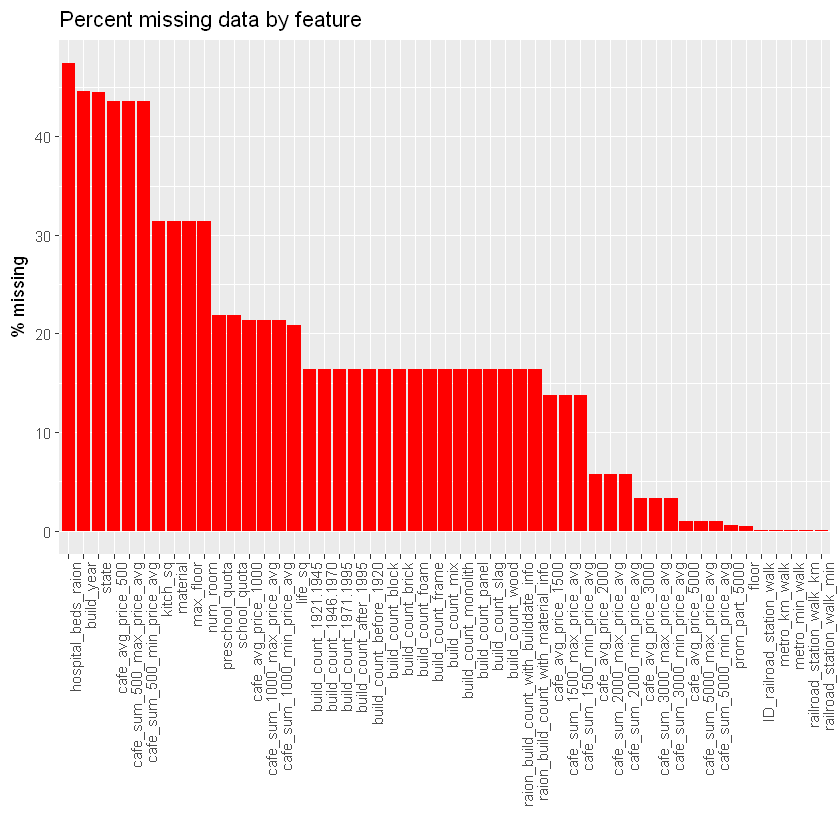

In [20]:
##library(tidyverse)
#miss_pct <- map_dbl(housingDataTrain, function(x) { round((sum(is.na(x)) / length(x)) * 100, 1) })

#miss_pct <- miss_pct[miss_pct > 0]

#data.frame(miss=miss_pct, var=names(miss_pct), row.names=NULL) %>%
 ##   ggplot(aes(x=reorder(var, -miss), y=miss)) + 
 #   geom_bar(stat='identity', fill='red') +
 #   labs(x='', y='% missing', title='Percent missing data by feature') +
 #   theme(axis.text.x=element_text(angle=90, hjust=1))

In [6]:
cond1 <- housingDataTrain$state == 33
housingDataTrain <- housingDataTrain[!cond1,]


In [7]:
# build_year has an erronus value 20052009. Since its unclear
#nwhich it should be, let's replace with 2007
housingDataTrain$build_year[housingDataTrain$build_year == 4965] <- 1965
housingDataTrain$build_year[housingDataTrain$build_year == 20052009] <- 2007

In [8]:
# using a sub set of data , using data for built_year > 1949
sb_tr_invest_49 <- housingDataTrain[ which(housingDataTrain$build_year > 1949 & 
                               housingDataTrain$product_type == "Investment"), ]
sb_tr_owner_49 <- housingDataTrain[ which(housingDataTrain$build_year > 1949 & 
                              housingDataTrain$product_type == "OwnerOccupier"), ]

#newdata <- mydata[ which(mydata$gender=='F' & mydata$age > 65), ]


In [193]:
#product_type
#sub_area
# culture_objects_top_25


In [194]:
#str(sb_tr_invest_49)

In [195]:
colnames(sb_tr_owner_49)

[1] "id"                                   
  [2] "timestamp"                            
  [3] "full_sq"                              
  [4] "life_sq"                              
  [5] "floor"                                
  [6] "max_floor"                            
  [7] "material"                             
  [8] "build_year"                           
  [9] "num_room"                             
 [10] "kitch_sq"                             
 [11] "state"                                
 [12] "product_type"                         
 [13] "sub_area"                             
 [14] "area_m"                               
 [15] "raion_popul"                          
 [16] "green_zone_part"                      
 [17] "indust_part"                          
 [18] "children_preschool"                   
 [19] "preschool_quota"                      
 [20] "preschool_education_centers_raion"    
 [21] "children_school"                      
 [22] "school_quota"                         
 [23] "school_education_centers_raion"       
 [24] "school_education_centers_top_20_raion"
 [25] "hospital_beds_raion"                  
 [26] "healthcare_centers_raion"             
 [27] "university_top_20_raion"              
 [28] "sport_objects_raion"                  
 [29] "additional_education_raion"           
 [30] "culture_objects_top_25"               
 [31] "culture_objects_top_25_raion"         
 [32] "shopping_centers_raion"               
 [33] "office_raion"                         
 [34] "thermal_power_plant_raion"            
 [35] "incineration_raion"                   
 [36] "oil_chemistry_raion"                  
 [37] "radiation_raion"                      
 [38] "railroad_terminal_raion"              
 [39] "big_market_raion"                     
 [40] "nuclear_reactor_raion"                
 [41] "detention_facility_raion"             
 [42] "full_all"                             
 [43] "male_f"                               
 [44] "female_f"                             
 [45] "young_all"                            
 [46] "young_male"                           
 [47] "young_female"                         
 [48] "work_all"                             
 [49] "work_male"                            
 [50] "work_female"                          
 [51] "ekder_all"                            
 [52] "ekder_male"                           
 [53] "ekder_female"                         
 [54] "X0_6_all"                             
 [55] "X0_6_male"                            
 [56] "X0_6_female"                          
 [57] "X7_14_all"                            
 [58] "X7_14_male"                           
 [59] "X7_14_female"                         
 [60] "X0_17_all"                            
 [61] "X0_17_male"                           
 [62] "X0_17_female"                         
 [63] "X16_29_all"                           
 [64] "X16_29_male"                          
 [65] "X16_29_female"                        
 [66] "X0_13_all"                            
 [67] "X0_13_male"                           
 [68] "X0_13_female"                         
 [69] "raion_build_count_with_material_info" 
 [70] "build_count_block"                    
 [71] "build_count_wood"                     
 [72] "build_count_frame"                    
 [73] "build_count_brick"                    
 [74] "build_count_monolith"                 
 [75] "build_count_panel"                    
 [76] "build_count_foam"                     
 [77] "build_count_slag"                     
 [78] "build_count_mix"                      
 [79] "raion_build_count_with_builddate_info"
 [80] "build_count_before_1920"              
 [81] "build_count_1921.1945"                
 [82] "build_count_1946.1970"                
 [83] "build_count_1971.1995"                
 [84] "build_count_after_1995"               
 [85] "ID_metro"                             
 [86] "metro_min_avto"                       
 [87] "metro_km_avto"                        


In [196]:
ncol(housingDataTrain)

[1] 292

### Feature Analysis 

In [44]:
#Identify highly correlated features in caret r packageR
# ensure the results are repeatable
set.seed(7)
# load the library
library(mlbench)
library(caret)
# load the data
#data(PimaIndiansDiabetes)
# calculate correlation matrix
correlationMatrix <- cor(housingDataTrain[,1:292])
# summarize the correlation matrix
print(correlationMatrix)
# find attributes that are highly corrected (ideally >0.75)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.5)
# print indexes of highly correlated attributes
print(highlyCorrelated)

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



ERROR: Error in cor(housingDataTrain[, 1:292]): 'x' must be numeric


In [88]:
sum(is.na(housingDataTrain))

[1] 0

In [197]:
str(housingDataTrain$product_type)

 num [1:6041] 1 1 1 1 1 1 1 1 1 1 ...


In [140]:
# housingDataTrain$timestamp <- as.numeric(housingDataTrain$timestamp)
# housingDataTrain$timestamp <- as.numeric(as.Date(housingDataTrain$timestamp))

In [9]:

housingDataTrain <- subset(housingDataTrain, select = -c(sub_area) )

In [174]:
library(dummies)
#housingDataTrain$ecology <- dummy( housingDataTrain$ecology )
housingDataTrain$ecology

NAexcellent NAgood NAno data NApoor NAsatisfactory
 [1,] 1           0      0         0      0             
 [2,] 0           1      0         0      0             
 [3,] 0           0      0         1      0             
 [4,] 0           0      0         1      0             
 [5,] 0           0      0         0      1             
 [6,] 0           0      0         1      0             
 [7,] 0           0      0         1      0             
 [8,] 0           0      0         0      1             
 [9,] 0           0      0         1      0             
[10,] 0           0      0         1      0             
[11,] 0           1      0         0      0             
[12,] 0           0      0         1      0             
[13,] 0           0      0         1      0             
[14,] 0           0      0         1      0             
[15,] 0           0      0         1      0             
[16,] 0           0      0         0      1             
[17,] 0           1      0         0      0             
[18,] 0           0      0         1      0             
[19,] 0           0      0         0      1             
[20,] 0           0      0         1      0             
[21,] 0           0      0         1      0             
[22,] 0           0      0         1      0             
[23,] 0           0      0         0      1             
[24,] 0           0      0         1      0             
[25,] 0           1      0         0      0             
[26,] 0           0      0         1      0             
[27,] 0           1      0         0      0             
[28,] 0           0      0         0      1             
[29,] 0           0      0         1      0             
[30,] 0           0      0         1      0             
[31,] ...         ...    ...       ...    ...           
[32,] 0           0      0         1      0             
[33,] 0           0      0         1      0             
[34,] 1           0      0         0      0             
[35,] 0           1      0         0      0             
[36,] 1           0      0         0      0             
[37,] 0           1      0         0      0             
[38,] 0           0      0         1      0             
[39,] 0           0      0         0      1             
[40,] 0           1      0         0      0             
[41,] 0           0      0         1      0             
[42,] 1           0      0         0      0             
[43,] 1           0      0         0      0             
[44,] 0           1      0         0      0             
[45,] 0           0      0         1      0             
[46,] 0           0      0         1      0             
[47,] 1           0      0         0      0             
[48,] 0           1      0         0      0             
[49,] 0           0      0         1      0             
[50,] 1           0      0         0      0             
[51,] 1           0      0         0      0             
[52,] 0           0      0         0      1             
[53,] 0           0      0         0      1             
[54,] 0           0      0         0      1             
[55,] 0           1      0         0      0             
[56,] 0           0      0         0      1             
[57,] 0           0      0         0      1             
[58,] 0           0      0         0      1             
[59,] 0           0      0         1      0             
[60,] 0           0      0         0      1             
[61,] 0           0      0         1      0

In [10]:
unique(housingDataTrain$ecology)
table(housingDataTrain$ecology)

[1] "excellent"    "good"         "poor"         "satisfactory" "no data"


   excellent         good      no data         poor satisfactory 
        1150         1103           41         2547         1200 

In [11]:
library(dplyr)
housingDataTrain<- filter(housingDataTrain , housingDataTrain$ecology != "no data")

Warning message:
"package 'dplyr' was built under R version 3.3.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
library(dummies)
new_ds <- dummy.data.frame(housingDataTrain, sep=".")
ncol(new_ds)

Warning message:
"package 'dummies' was built under R version 3.3.2"dummies-1.5.6 provided by Decision Patterns



[1] 294

In [213]:
# Get all character 

#columns <- housingDataTrain[, sapply(housingDataTrain, class) == 'character']
columns <- new_ds[, sapply(new_ds, class) == 'character']
colnames(columns)
print(columns)

character(0)

data frame with 0 columns and 6041 rows


In [156]:
sum(is.na(housingDataTrain))

[1] 0

In [216]:
ncol(new_ds)
#str(housingDataTrain)

[1] 295

In [158]:
colnames(housingDataTrain)

[1] "id"                                   
  [2] "timestamp"                            
  [3] "full_sq"                              
  [4] "life_sq"                              
  [5] "floor"                                
  [6] "max_floor"                            
  [7] "material"                             
  [8] "build_year"                           
  [9] "num_room"                             
 [10] "kitch_sq"                             
 [11] "state"                                
 [12] "product_type"                         
 [13] "area_m"                               
 [14] "raion_popul"                          
 [15] "green_zone_part"                      
 [16] "indust_part"                          
 [17] "children_preschool"                   
 [18] "preschool_quota"                      
 [19] "preschool_education_centers_raion"    
 [20] "children_school"                      
 [21] "school_quota"                         
 [22] "school_education_centers_raion"       
 [23] "school_education_centers_top_20_raion"
 [24] "hospital_beds_raion"                  
 [25] "healthcare_centers_raion"             
 [26] "university_top_20_raion"              
 [27] "sport_objects_raion"                  
 [28] "additional_education_raion"           
 [29] "culture_objects_top_25"               
 [30] "culture_objects_top_25_raion"         
 [31] "shopping_centers_raion"               
 [32] "office_raion"                         
 [33] "thermal_power_plant_raion"            
 [34] "incineration_raion"                   
 [35] "oil_chemistry_raion"                  
 [36] "radiation_raion"                      
 [37] "railroad_terminal_raion"              
 [38] "big_market_raion"                     
 [39] "nuclear_reactor_raion"                
 [40] "detention_facility_raion"             
 [41] "full_all"                             
 [42] "male_f"                               
 [43] "female_f"                             
 [44] "young_all"                            
 [45] "young_male"                           
 [46] "young_female"                         
 [47] "work_all"                             
 [48] "work_male"                            
 [49] "work_female"                          
 [50] "ekder_all"                            
 [51] "ekder_male"                           
 [52] "ekder_female"                         
 [53] "X0_6_all"                             
 [54] "X0_6_male"                            
 [55] "X0_6_female"                          
 [56] "X7_14_all"                            
 [57] "X7_14_male"                           
 [58] "X7_14_female"                         
 [59] "X0_17_all"                            
 [60] "X0_17_male"                           
 [61] "X0_17_female"                         
 [62] "X16_29_all"                           
 [63] "X16_29_male"                          
 [64] "X16_29_female"                        
 [65] "X0_13_all"                            
 [66] "X0_13_male"                           
 [67] "X0_13_female"                         
 [68] "raion_build_count_with_material_info" 
 [69] "build_count_block"                    
 [70] "build_count_wood"                     
 [71] "build_count_frame"                    
 [72] "build_count_brick"                    
 [73] "build_count_monolith"                 
 [74] "build_count_panel"                    
 [75] "build_count_foam"                     
 [76] "build_count_slag"                     
 [77] "build_count_mix"                      
 [78] "raion_build_count_with_builddate_info"
 [79] "build_count_before_1920"              
 [80] "build_count_1921.1945"                
 [81] "build_count_1946.1970"                
 [82] "build_count_1971.1995"                
 [83] "build_count_after_1995"               
 [84] "ID_metro"                             
 [85] "metro_min_avto"                       
 [86] "metro_km_avto"                        
 [87] "metro_min_walk"                       


In [9]:
require(randomForest) 
Model_randomForest <- randomForest(price_doc ~ .,
                                   numeric_data,ntree=50, importance=T)
summary(Model_randomForest)


                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted       30471  -none- numeric  
mse                50  -none- numeric  
rsq                50  -none- numeric  
oob.times       30471  -none- numeric  
importance        550  -none- numeric  
importanceSD      275  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             11  -none- list     
coefs               0  -none- NULL     
y               30471  -none- numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     


Call:
 randomForest(formula = price_doc ~ ., data = numeric_data, ntree = 50,      importance = T) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 91

          Mean of squared residuals: 7.379454e+12
                    % Var explained: 67.7

NULL

[1] "id"                                   
  [2] "full_sq"                              
  [3] "life_sq"                              
  [4] "floor"                                
  [5] "max_floor"                            
  [6] "material"                             
  [7] "build_year"                           
  [8] "num_room"                             
  [9] "kitch_sq"                             
 [10] "state"                                
 [11] "area_m"                               
 [12] "raion_popul"                          
 [13] "green_zone_part"                      
 [14] "indust_part"                          
 [15] "children_preschool"                   
 [16] "preschool_quota"                      
 [17] "preschool_education_centers_raion"    
 [18] "children_school"                      
 [19] "school_quota"                         
 [20] "school_education_centers_raion"       
 [21] "school_education_centers_top_20_raion"
 [22] "hospital_beds_raion"                  
 [23] "healthcare_centers_raion"             
 [24] "university_top_20_raion"              
 [25] "sport_objects_raion"                  
 [26] "additional_education_raion"           
 [27] "culture_objects_top_25_raion"         
 [28] "shopping_centers_raion"               
 [29] "office_raion"                         
 [30] "full_all"                             
 [31] "male_f"                               
 [32] "female_f"                             
 [33] "young_all"                            
 [34] "young_male"                           
 [35] "young_female"                         
 [36] "work_all"                             
 [37] "work_male"                            
 [38] "work_female"                          
 [39] "ekder_all"                            
 [40] "ekder_male"                           
 [41] "ekder_female"                         
 [42] "X0_6_all"                             
 [43] "X0_6_male"                            
 [44] "X0_6_female"                          
 [45] "X7_14_all"                            
 [46] "X7_14_male"                           
 [47] "X7_14_female"                         
 [48] "X0_17_all"                            
 [49] "X0_17_male"                           
 [50] "X0_17_female"                         
 [51] "X16_29_all"                           
 [52] "X16_29_male"                          
 [53] "X16_29_female"                        
 [54] "X0_13_all"                            
 [55] "X0_13_male"                           
 [56] "X0_13_female"                         
 [57] "raion_build_count_with_material_info" 
 [58] "build_count_block"                    
 [59] "build_count_wood"                     
 [60] "build_count_frame"                    
 [61] "build_count_brick"                    
 [62] "build_count_monolith"                 
 [63] "build_count_panel"                    
 [64] "build_count_foam"                     
 [65] "build_count_slag"                     
 [66] "build_count_mix"                      
 [67] "raion_build_count_with_builddate_info"
 [68] "build_count_before_1920"              
 [69] "build_count_1921.1945"                
 [70] "build_count_1946.1970"                
 [71] "build_count_1971.1995"                
 [72] "build_count_after_1995"               
 [73] "ID_metro"                             
 [74] "metro_min_avto"                       
 [75] "metro_km_avto"                        
 [76] "metro_min_walk"                       
 [77] "metro_km_walk"                        
 [78] "kindergarten_km"                      
 [79] "school_km"                            
 [80] "park_km"                              
 [81] "green_zone_km"                        
 [82] "industrial_km"                        
 [83] "water_treatment_km"                   
 [84] "cemetery_km"                          
 [85] "incineration_km"                      
 [86] "railroad_station_walk_km"             
 [87] "railroad_station_walk_min"            


NULL

ERROR: Error in order(var.imp$MeanDecreaseGini, decreasing = T): argument 1 is not a vector


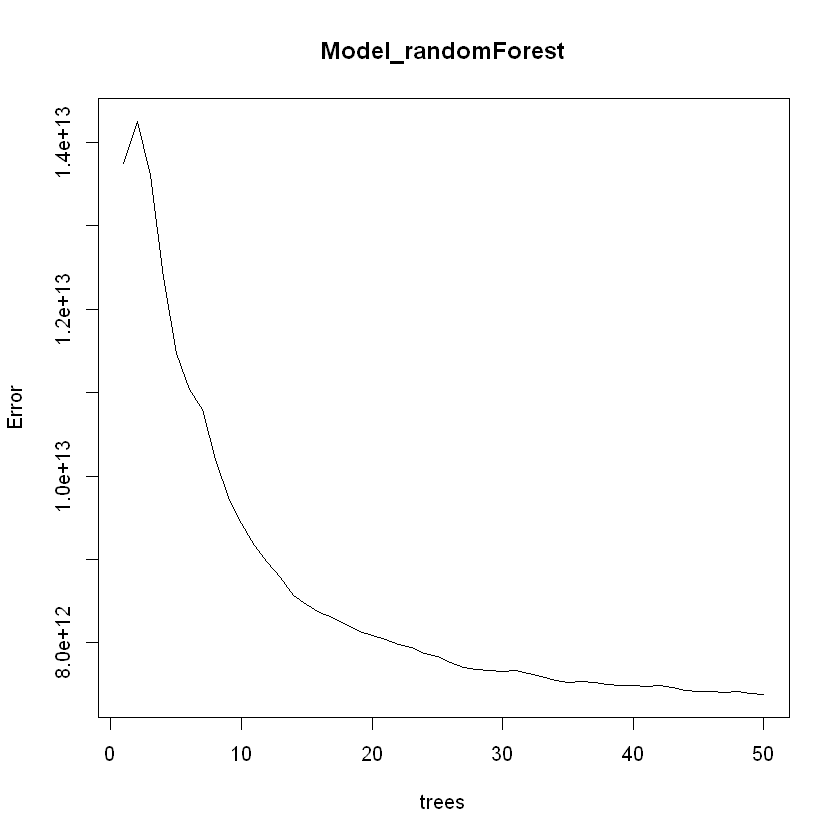

In [10]:
Model_randomForest
plot(Model_randomForest)  
#RM_02_Targeted Marketing Campaign 
# Variable Importance Plchtance Table
var.imp <- data.frame(importance(Model_randomForest, type=2))
var.imp$importance
# make row names as columns
var.imp$Variables <- row.names(var.imp) 
var.imp$Variables
var.imp$MeanDecreaseGini
var.imp[order(var.imp$MeanDecreaseGini,decreasing = T),]  

In [12]:
var.imp
summary(var.imp)

IncNodePurity
id                                    9.651539e+15 
full_sq                               1.898464e+17 
life_sq                               4.882571e+16 
floor                                 5.068073e+15 
max_floor                             4.390985e+15 
material                              8.607177e+14 
build_year                            5.179288e+15 
num_room                              4.451407e+16 
kitch_sq                              1.236505e+16 
state                                 3.427112e+15 
area_m                                6.403345e+14 
raion_popul                           2.927056e+14 
green_zone_part                       8.682621e+14 
indust_part                           1.018154e+15 
children_preschool                    1.902311e+14 
preschool_quota                       8.726111e+14 
preschool_education_centers_raion     4.172533e+14 
children_school                       1.490594e+14 
school_quota                          5.449424e+14 
school_education_centers_raion        4.783262e+14 
school_education_centers_top_20_raion 2.080951e+14 
hospital_beds_raion                   1.492191e+15 
healthcare_centers_raion              3.670398e+14 
university_top_20_raion               1.242441e+14 
sport_objects_raion                   7.152136e+14 
additional_education_raion            3.767054e+14 
culture_objects_top_25_raion          9.327951e+13 
shopping_centers_raion                4.645867e+14 
office_raion                          3.894446e+14 
full_all                              3.590040e+14 
...                                   ...          
cafe_count_3000_price_high            2.143919e+14 
big_church_count_3000                 4.958450e+14 
church_count_3000                     4.979100e+14 
mosque_count_3000                     7.010156e+13 
leisure_count_3000                    7.347303e+14 
sport_count_3000                      6.558398e+15 
market_count_3000                     3.085353e+14 
green_part_5000                       1.434701e+15 
prom_part_5000                        1.429055e+15 
office_count_5000                     1.246604e+15 
office_sqm_5000                       7.406636e+15 
trc_count_5000                        9.091676e+14 
trc_sqm_5000                          1.368581e+15 
cafe_count_5000                       2.618630e+15 
cafe_sum_5000_min_price_avg           1.293659e+15 
cafe_sum_5000_max_price_avg           1.252292e+15 
cafe_avg_price_5000                   1.180346e+15 
cafe_count_5000_na_price              5.860007e+14 
cafe_count_5000_price_500             5.212538e+14 
cafe_count_5000_price_1000            1.475346e+15 
cafe_count_5000_price_1500            3.662037e+15 
cafe_count_5000_price_2500            1.223829e+16 
cafe_count_5000_price_4000            1.285380e+15 
cafe_count_5000_price_high            1.219048e+16 
big_church_count_5000                 5.539369e+14 
church_count_5000                     1.519604e+15 
mosque_count_5000                     1.258872e+14 
leisure_count_5000                    5.600395e+14 
sport_count_5000                      1.343759e+15 
market_count_5000                     4.298210e+14 
                                      Variables                            
id                                    id                                   
full_sq                               full_sq                              
life_sq                               life_sq                              
floor                                 floor                                
max_floor                             max_floor                            
material                              material                             
build_year                            build_year                           
num_room                              num_room                             
kitch_sq                              kitch_sq                             
state                                 state           

 IncNodePurity        Variables        
 Min.   :1.168e+13   Length:275        
 1st Qu.:4.238e+14   Class :character  
 Median :9.311e+14   Mode  :character  
 Mean   :2.483e+15                     
 3rd Qu.:1.847e+15                     
 Max.   :1.898e+17                     

In [14]:
sample_numeric_data <- numeric_data[1:100,]
dim(sample_numeric_data)

[1] 100 276

In [46]:
sample_numeric_data<-subset(sample_numeric_data, select = -c(id) )

In [47]:
Model_randomForest <- randomForest(as.factor(price_doc) ~ .,
                                   sample_numeric_data,ntree=50, importance=T)
summary(Model_randomForest)

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted         100  factor numeric  
err.rate         3450  -none- numeric  
confusion        4692  -none- numeric  
votes            6800  matrix numeric  
oob.times         100  -none- numeric  
classes            68  -none- character
importance      19180  -none- numeric  
importanceSD    18906  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y                 100  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     


Call:
 randomForest(formula = as.factor(price_doc) ~ ., data = sample_numeric_data,      ntree = 50, importance = T) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 16

        OOB estimate of  error rate: 99%
Confusion matrix:
         500000 990000 1000000 1050000 1850000 2000000 2080000 2312800 2600000
500000        0      0       0       0       0       0       0       0       0
990000        0      1       0       1       0       1       0       0       0
1000000       0      0       0       0       0       0       0       0       0
1050000       1      0       0       0       0       0       0       0       0
1850000       0      0       0       0       0       0       0       0       0
2000000       0      0       0       1       0       0       0       0       0
2080000       0      0       0       0       0       1       0       0       0
2312800       0      0       0       0       0       0

NULL

[1] "full_sq"                              
  [2] "life_sq"                              
  [3] "floor"                                
  [4] "max_floor"                            
  [5] "material"                             
  [6] "build_year"                           
  [7] "num_room"                             
  [8] "kitch_sq"                             
  [9] "state"                                
 [10] "area_m"                               
 [11] "raion_popul"                          
 [12] "green_zone_part"                      
 [13] "indust_part"                          
 [14] "children_preschool"                   
 [15] "preschool_quota"                      
 [16] "preschool_education_centers_raion"    
 [17] "children_school"                      
 [18] "school_quota"                         
 [19] "school_education_centers_raion"       
 [20] "school_education_centers_top_20_raion"
 [21] "hospital_beds_raion"                  
 [22] "healthcare_centers_raion"             
 [23] "university_top_20_raion"              
 [24] "sport_objects_raion"                  
 [25] "additional_education_raion"           
 [26] "culture_objects_top_25_raion"         
 [27] "shopping_centers_raion"               
 [28] "office_raion"                         
 [29] "full_all"                             
 [30] "male_f"                               
 [31] "female_f"                             
 [32] "young_all"                            
 [33] "young_male"                           
 [34] "young_female"                         
 [35] "work_all"                             
 [36] "work_male"                            
 [37] "work_female"                          
 [38] "ekder_all"                            
 [39] "ekder_male"                           
 [40] "ekder_female"                         
 [41] "X0_6_all"                             
 [42] "X0_6_male"                            
 [43] "X0_6_female"                          
 [44] "X7_14_all"                            
 [45] "X7_14_male"                           
 [46] "X7_14_female"                         
 [47] "X0_17_all"                            
 [48] "X0_17_male"                           
 [49] "X0_17_female"                         
 [50] "X16_29_all"                           
 [51] "X16_29_male"                          
 [52] "X16_29_female"                        
 [53] "X0_13_all"                            
 [54] "X0_13_male"                           
 [55] "X0_13_female"                         
 [56] "raion_build_count_with_material_info" 
 [57] "build_count_block"                    
 [58] "build_count_wood"                     
 [59] "build_count_frame"                    
 [60] "build_count_brick"                    
 [61] "build_count_monolith"                 
 [62] "build_count_panel"                    
 [63] "build_count_foam"                     
 [64] "build_count_slag"                     
 [65] "build_count_mix"                      
 [66] "raion_build_count_with_builddate_info"
 [67] "build_count_before_1920"              
 [68] "build_count_1921.1945"                
 [69] "build_count_1946.1970"                
 [70] "build_count_1971.1995"                
 [71] "build_count_after_1995"               
 [72] "ID_metro"                             
 [73] "metro_min_avto"                       
 [74] "metro_km_avto"                        
 [75] "metro_min_walk"                       
 [76] "metro_km_walk"                        
 [77] "kindergarten_km"                      
 [78] "school_km"                            
 [79] "park_km"                              
 [80] "green_zone_km"                        
 [81] "industrial_km"                        
 [82] "water_treatment_km"                   
 [83] "cemetery_km"                          
 [84] "incineration_km"                      
 [85] "railroad_station_walk_km"             
 [86] "railroad_station_walk_min"            
 [87] "ID_railroad_station_walk"             


[1] 0.75990431 0.59575918 0.41171429 0.00000000 0.00000000 0.00000000
  [7] 0.00000000 0.00000000 0.00000000 0.56193888 0.24422955 0.32664294
 [13] 0.11763895 0.28735182 0.24879076 0.46754597 0.38901652 0.22763631
 [19] 0.11815416 0.17001667 0.42432619 0.47699824 0.02000000 0.23061058
 [25] 0.45219962 0.19092951 0.33056119 0.27647456 0.22186667 0.47147011
 [31] 0.33373020 0.33610140 0.28516778 0.19026190 0.48222761 0.50458272
 [37] 0.33023589 0.23589918 0.53542866 0.32530481 0.25562274 0.35442900
 [43] 0.31379634 0.24252624 0.35566667 0.49350478 0.34613202 0.23962400
 [49] 0.50718160 0.51106419 0.25097192 0.25032054 0.18754217 0.19200000
 [55] 0.33794749 0.32322042 0.68792786 0.27630863 0.22629654 0.20080994
 [61] 0.31078689 0.45206432 0.00000000 0.20207811 0.10000000 0.38401258
 [67] 0.06000000 0.17803199 0.36961618 0.41691209 0.06000000 0.75357694
 [73] 0.25118314 0.52869110 0.41397270 0.70058629 0.62712379 0.58512367
 [79] 0.63453725 0.57862780 1.04413646 0.50570358 0.84516100 0.42054989
 [85] 0.49316265 0.25797151 0.32373779 0.67914938 0.44228034 0.49201163
 [91] 0.50202432 0.91729345 0.68048533 0.54059832 0.54066041 0.32616560
 [97] 0.33594293 0.28953668 0.58259074 0.49862821 0.62454616 0.21524162
[103] 0.74548678 0.60761714 0.37657603 0.33410247 0.19009957 0.57370514
[109] 0.59327279 0.67855404 0.49289662 0.61757199 0.59565875 0.36027883
[115] 0.50791097 0.63945631 0.97954096 0.66307934 0.27227778 0.34417237
[121] 0.32001906 0.57060954 0.66476764 0.54953277 0.95887166 0.53748523
[127] 0.35570153 0.76984992 0.66489820 0.40282223 0.85970673 0.82512140
[133] 0.47542665 0.32312613 0.45935693 0.64695330 0.51828265 0.35732989
[139] 0.08400000 0.07933333 0.28780914 0.23049673 0.36429673 0.45001399
[145] 0.59554515 0.38835162 0.13411339 0.09466667 0.31743771 0.17339907
[151] 0.06000000 0.05890196 0.00000000 0.04000000 0.20726984 0.00000000
[157] 0.18992674 0.15739927 0.24383041 0.68727095 0.55062291 0.22315954
[163] 0.37853429 0.34753429 0.44619102 0.55853110 0.45730441 0.55172413
[169] 0.60300521 0.20482051 0.15078755 0.36271517 0.14866667 0.02000000
[175] 0.14397087 0.00000000 0.19589669 0.07990476 0.05846809 0.21574308
[181] 0.47958794 0.20281738 0.32118649 0.64106077 0.13871733 0.26548040
[187] 0.35393210 0.63446216 0.25600000 0.55191892 0.15170541 0.71842686
[193] 0.08000000 0.34959477 0.19912783 0.33274555 0.28043438 0.19349616
[199] 0.02000000 0.24628571 0.18266667 0.02000000 0.21802693 0.31996874
[205] 0.05200000 0.39647932 0.47982035 0.50813986 0.25152121 0.15700433
[211] 0.46568152 0.36782036 0.33402916 0.65967948 0.27878897 0.29650047
[217] 0.61315455 0.17196296 0.28270014 0.24358066 0.22759649 0.07890000
[223] 0.09158974 0.15264646 0.17515576 0.23153140 0.34519531 0.15235679
[229] 0.47608949 0.43776853 0.22049300 0.34892063 0.57617614 0.20897151
[235] 0.40340620 0.33110731 0.30636904 0.46002342 0.35144531 0.16707792
[241] 0.22199134 0.25716625 0.15471429 0.17333333 0.24157286 0.49739776
[247] 0.33301537 0.10740179 0.12491029 0.34779631 0.35221235 0.55811628
[253] 0.56946391 0.28397578 0.09266667 0.50512800 0.43441864 0.21781061
[259] 0.48084308 0.46023315 0.07833333 0.11200000 0.27617027 0.27320000
[265] 0.20728687 0.24966667 0.46993936 0.12833333 0.31084749 0.39681543
[271] 0.09365366 0.27604158 0.40489178 0.38891714

MeanDecreaseGini
industrial_km                     1.0441365       
swim_pool_km                      0.9795410       
workplaces_km                     0.9588717       
public_transport_station_min_walk 0.9172934       
church_synagogue_km               0.8597067       
cemetery_km                       0.8451610       
mosque_km                         0.8251214       
additional_education_km           0.7698499       
full_sq                           0.7599043       
ID_metro                          0.7535769       
railroad_km                       0.7454868       
cafe_avg_price_1500               0.7184269       
metro_km_walk                     0.7005863       
build_count_block                 0.6879279       
green_part_1000                   0.6872709       
water_km                          0.6804853       
railroad_station_avto_km          0.6791494       
radiation_km                      0.6785540       
preschool_km                      0.6648982       
public_healthcare_km              0.6647676       
ice_rink_km                       0.6630793       
cafe_sum_2000_max_price_avg       0.6596795       
catering_km                       0.6469533       
prom_part_1500                    0.6410608       
fitness_km                        0.6394563       
park_km                           0.6345372       
trc_sqm_1500                      0.6344622       
kindergarten_km                   0.6271238       
big_road2_km                      0.6245462       
thermal_power_plant_km            0.6175720       
...                               ...             
mosque_count_5000                 0.09365366      
office_sqm_5000                   0.09266667      
big_church_count_2000             0.09158974      
office_count_500                  0.08400000      
cafe_count_1500_na_price          0.08000000      
church_count_1000                 0.07990476      
office_sqm_500                    0.07933333      
cafe_count_2000_price_high        0.07890000      
cafe_avg_price_5000               0.07833333      
build_count_before_1920           0.06000000      
build_count_after_1995            0.06000000      
cafe_count_500_price_2500         0.06000000      
cafe_count_500_price_4000         0.05890196      
mosque_count_1000                 0.05846809      
market_count_1500                 0.05200000      
big_church_count_500              0.04000000      
university_top_20_raion           0.02000000      
cafe_count_1000_price_2500        0.02000000      
cafe_count_1500_price_high        0.02000000      
mosque_count_1500                 0.02000000      
max_floor                         0.00000000      
material                          0.00000000      
build_year                        0.00000000      
num_room                          0.00000000      
kitch_sq                          0.00000000      
state                             0.00000000      
build_count_foam                  0.00000000      
cafe_count_500_price_high         0.00000000      
mosque_count_500                  0.00000000      
cafe_count_1000_price_high        0.00000000      
                                  Variables                        
industrial_km                     industrial_km                    
swim_pool_km                      swim_pool_km                     
workplaces_km                     workplaces_km                    
public_transport_station_min_walk public_transport_station_min_walk
church_synagogue_km               church_synagogue_km              
cemetery_km                       cemetery_km                      
mosque_km                         mosque_km                        
additional_education_km           additional_education_km          
full_sq                           full_sq                          
ID_metro                          ID_metro                         
railroad_km                       railroad_km                      
cafe_avg_price_1500               cafe_avg_price_1500   

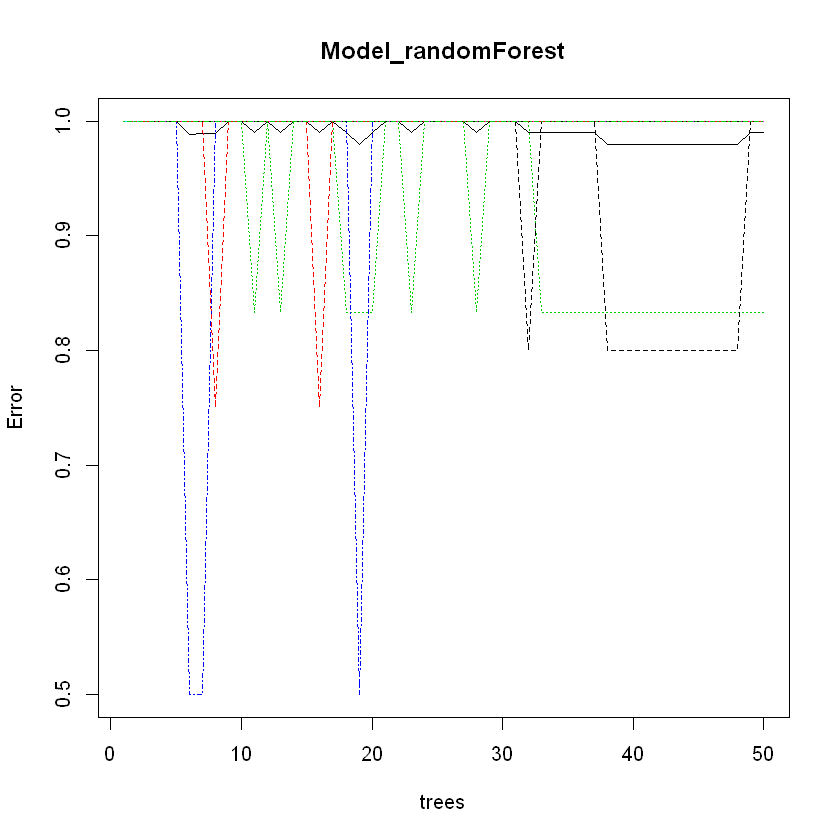

In [48]:
Model_randomForest
plot(Model_randomForest)  
#RM_02_Targeted Marketing Campaign 
# Variable Importance Plchtance Table
var.imp <- data.frame(importance(Model_randomForest, type=2))
var.imp$importance
# make row names as columns
var.imp$Variables <- row.names(var.imp) 
var.imp$Variables
var.imp$MeanDecreaseGini
var.imp[order(var.imp$MeanDecreaseGini,decreasing = T),]  

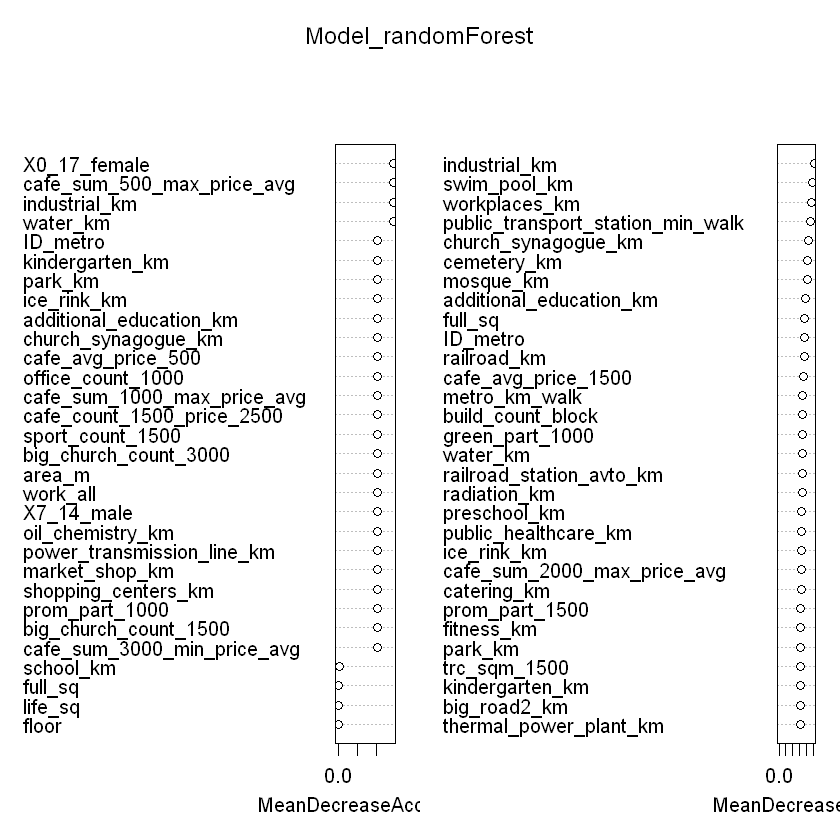

In [49]:
varImpPlot(Model_randomForest)

In [50]:
x <-importance(Model_randomForest)

In [51]:
dim(x)

[1] 274  70

In [52]:
x

500000 990000    1000000 1050000 1850000
full_sq                               0      0         0       0       0      
life_sq                               0      0         0       0       0      
floor                                 0      0         0       0       0      
max_floor                             0      0         0       0       0      
material                              0      0         0       0       0      
build_year                            0      0         0       0       0      
num_room                              0      0         0       0       0      
kitch_sq                              0      0         0       0       0      
state                                 0      0         0       0       0      
area_m                                0      0         0       0       0      
raion_popul                           0      0         0       0       0      
green_zone_part                       0      0         0       0       0      
indust_part                           0      0         0       0       0      
children_preschool                    0      0         0       0       0      
preschool_quota                       0      0         0       0       0      
preschool_education_centers_raion     0      0         0       0       0      
children_school                       0      0         0       0       0      
school_quota                          0      0         0       0       0      
school_education_centers_raion        0      0         0       0       0      
school_education_centers_top_20_raion 0      0         0       0       0      
hospital_beds_raion                   0      0         0       0       0      
healthcare_centers_raion              0      0         0       0       0      
university_top_20_raion               0      0         0       0       0      
sport_objects_raion                   0      0         0       0       0      
additional_education_raion            0      0         0       0       0      
culture_objects_top_25_raion          0      0         0       0       0      
shopping_centers_raion                0      0         0       0       0      
office_raion                          0      0         0       0       0      
full_all                              0      0         0       0       0      
male_f                                0      0         0       0       0      
...                                   ...    ...       ...     ...     ...    
cafe_count_3000_price_high            0       0.000000 0       0       0      
big_church_count_3000                 0       0.000000 0       0       0      
church_count_3000                     0       0.000000 0       0       0      
mosque_count_3000                     0       0.000000 0       0       0      
leisure_count_3000                    0      -1.010153 0       0       0      
sport_count_3000                      0       0.000000 0       0       0      
market_count_3000                     0       0.000000 0       0       0      
green_part_5000                       0      -1.010153 0       0       0      
prom_part_5000                        0       0.000000 0       0       0      
office_count_5000                     0       0.000000 0       0       0      
office_sqm_5000                       0       0.000000 0       0       0      
trc_count_5000                        0       0.000000 0       0       0      
trc_sqm_5000                          0       0.000000 0       0       0      
cafe_count_5000                       0       0.000000 0       0       0      
cafe_sum_5000_min_price_avg           0      -1.010153 0       0       0      
cafe_sum_5000_max_price_avg           0       0.000000 0       0       0      
cafe_avg_price_5000                   0       0.000000 0       0       0      
cafe_count_5000_na_price              0       0.000000 0       0       0      
cafe_count_5000_price_500             0       0.000000 0       0       0      
cafe_coun

In [53]:
library(caret)
varImp(Model_randomForest)

500000 990000    1000000 1050000 1850000
full_sq                               0      0         0       0       0      
life_sq                               0      0         0       0       0      
floor                                 0      0         0       0       0      
max_floor                             0      0         0       0       0      
material                              0      0         0       0       0      
build_year                            0      0         0       0       0      
num_room                              0      0         0       0       0      
kitch_sq                              0      0         0       0       0      
state                                 0      0         0       0       0      
area_m                                0      0         0       0       0      
raion_popul                           0      0         0       0       0      
green_zone_part                       0      0         0       0       0      
indust_part                           0      0         0       0       0      
children_preschool                    0      0         0       0       0      
preschool_quota                       0      0         0       0       0      
preschool_education_centers_raion     0      0         0       0       0      
children_school                       0      0         0       0       0      
school_quota                          0      0         0       0       0      
school_education_centers_raion        0      0         0       0       0      
school_education_centers_top_20_raion 0      0         0       0       0      
hospital_beds_raion                   0      0         0       0       0      
healthcare_centers_raion              0      0         0       0       0      
university_top_20_raion               0      0         0       0       0      
sport_objects_raion                   0      0         0       0       0      
additional_education_raion            0      0         0       0       0      
culture_objects_top_25_raion          0      0         0       0       0      
shopping_centers_raion                0      0         0       0       0      
office_raion                          0      0         0       0       0      
full_all                              0      0         0       0       0      
male_f                                0      0         0       0       0      
...                                   ...    ...       ...     ...     ...    
cafe_count_3000_price_high            0       0.000000 0       0       0      
big_church_count_3000                 0       0.000000 0       0       0      
church_count_3000                     0       0.000000 0       0       0      
mosque_count_3000                     0       0.000000 0       0       0      
leisure_count_3000                    0      -1.010153 0       0       0      
sport_count_3000                      0       0.000000 0       0       0      
market_count_3000                     0       0.000000 0       0       0      
green_part_5000                       0      -1.010153 0       0       0      
prom_part_5000                        0       0.000000 0       0       0      
office_count_5000                     0       0.000000 0       0       0      
office_sqm_5000                       0       0.000000 0       0       0      
trc_count_5000                        0       0.000000 0       0       0      
trc_sqm_5000                          0       0.000000 0       0       0      
cafe_count_5000                       0       0.000000 0       0       0      
cafe_sum_5000_min_price_avg           0      -1.010153 0       0       0      
cafe_sum_5000_max_price_avg           0       0.000000 0       0       0      
cafe_avg_price_5000                   0       0.000000 0       0       0      
cafe_count_5000_na_price              0       0.000000 0       0       0      
cafe_count_5000_price_500             0       0.000000 0       0       0      
cafe_coun

In [54]:
varImportance <- data.frame(Variables = row.names(x), Importance = round(x[ ,'MeanDecreaseGini'],2))

In [55]:
varImportance


Variables                            
full_sq                               full_sq                              
life_sq                               life_sq                              
floor                                 floor                                
max_floor                             max_floor                            
material                              material                             
build_year                            build_year                           
num_room                              num_room                             
kitch_sq                              kitch_sq                             
state                                 state                                
area_m                                area_m                               
raion_popul                           raion_popul                          
green_zone_part                       green_zone_part                      
indust_part                           indust_part                          
children_preschool                    children_preschool                   
preschool_quota                       preschool_quota                      
preschool_education_centers_raion     preschool_education_centers_raion    
children_school                       children_school                      
school_quota                          school_quota                         
school_education_centers_raion        school_education_centers_raion       
school_education_centers_top_20_raion school_education_centers_top_20_raion
hospital_beds_raion                   hospital_beds_raion                  
healthcare_centers_raion              healthcare_centers_raion             
university_top_20_raion               university_top_20_raion              
sport_objects_raion                   sport_objects_raion                  
additional_education_raion            additional_education_raion           
culture_objects_top_25_raion          culture_objects_top_25_raion         
shopping_centers_raion                shopping_centers_raion               
office_raion                          office_raion                         
full_all                              full_all                             
male_f                                male_f                               
...                                   ...                                  
cafe_count_3000_price_high            cafe_count_3000_price_high           
big_church_count_3000                 big_church_count_3000                
church_count_3000                     church_count_3000                    
mosque_count_3000                     mosque_count_3000                    
leisure_count_3000                    leisure_count_3000                   
sport_count_3000                      sport_count_3000                     
market_count_3000                     market_count_3000                    
green_part_5000                       green_part_5000                      
prom_part_5000                        prom_part_5000                       
office_count_5000                     office_count_5000                    
office_sqm_5000                       office_sqm_5000                      
trc_count_5000                        trc_count_5000                       
trc_sqm_5000                          trc_sqm_5000                         
cafe_count_5000                       cafe_count_5000                      
cafe_sum_5000_min_price_avg           cafe_sum_5000_min_price_avg          
cafe_sum_5000_max_price_avg           cafe_sum_5000_max_price_avg          
cafe_avg_price_5000                   cafe_avg_price_5000                  
cafe_count_5000_na_price              cafe_count_5000_na_price             
cafe_count_5000_price_500             cafe_count_5000_price_500            
cafe_count_5000_price_1000            cafe_count_5000_price_1000           
cafe_count_5000_price_1500            cafe_count_5000_price_1500           
cafe_count

In [56]:
rankImportance <- varImportance %>%
  mutate(Rank = paste0('#',dense_rank(desc(Importance))))

In [57]:
rankImportance

Variables                             Importance Rank
1   full_sq                               0.76       #9  
2   life_sq                               0.60       #21 
3   floor                                 0.41       #40 
4   max_floor                             0.00       #78 
5   material                              0.00       #78 
6   build_year                            0.00       #78 
7   num_room                              0.00       #78 
8   kitch_sq                              0.00       #78 
9   state                                 0.00       #78 
10  area_m                                0.56       #25 
11  raion_popul                           0.24       #57 
12  green_zone_part                       0.33       #48 
13  indust_part                           0.12       #69 
14  children_preschool                    0.29       #52 
15  preschool_quota                       0.25       #56 
16  preschool_education_centers_raion     0.47       #34 
17  children_school                       0.39       #42 
18  school_quota                          0.23       #58 
19  school_education_centers_raion        0.12       #69 
20  school_education_centers_top_20_raion 0.17       #64 
21  hospital_beds_raion                   0.42       #39 
22  healthcare_centers_raion              0.48       #33 
23  university_top_20_raion               0.02       #77 
24  sport_objects_raion                   0.23       #58 
25  additional_education_raion            0.45       #36 
26  culture_objects_top_25_raion          0.19       #62 
27  shopping_centers_raion                0.33       #48 
28  office_raion                          0.28       #53 
29  full_all                              0.22       #59 
30  male_f                                0.47       #34 
... ...                                   ...        ... 
245 cafe_count_3000_price_high            0.24       #57 
246 big_church_count_3000                 0.50       #31 
247 church_count_3000                     0.33       #48 
248 mosque_count_3000                     0.11       #70 
249 leisure_count_3000                    0.12       #69 
250 sport_count_3000                      0.35       #46 
251 market_count_3000                     0.35       #46 
252 green_part_5000                       0.56       #25 
253 prom_part_5000                        0.57       #24 
254 office_count_5000                     0.28       #53 
255 office_sqm_5000                       0.09       #72 
256 trc_count_5000                        0.51       #30 
257 trc_sqm_5000                          0.43       #38 
258 cafe_count_5000                       0.22       #59 
259 cafe_sum_5000_min_price_avg           0.48       #33 
260 cafe_sum_5000_max_price_avg           0.46       #35 
261 cafe_avg_price_5000                   0.08       #73 
262 cafe_count_5000_na_price              0.11       #70 
263 cafe_count_5000_price_500             0.28       #53 
264 cafe_count_5000_price_1000            0.27       #54 
265 cafe_count_5000_price_1500            0.21       #60 
266 cafe_count_5000_price_2500            0.25       #56 
267 cafe_count_5000_price_4000            0.47       #34 
268 cafe_count_5000_price_high            0.13       #68 
269 big_church_count_5000                 0.31       #50 
270 church_count_5000                     0.40       #41 
271 mosque_count_5000                     0.09       #72 
272 leisure_count_5000                    0.28       #53 
273 sport_count_5000                      0.40       #41 
274 market_count_5000                     0.39       #42

In [77]:
newdata <- rankImportance[ which(rankImportance$Importance > 0.60), ]

In [78]:
newdata[order(newdata$Importance, decreasing = TRUE),]

# population[order(population$age),]

Variables                         Importance Rank
81  industrial_km                     1.04       #1  
117 swim_pool_km                      0.98       #2  
125 workplaces_km                     0.96       #3  
92  public_transport_station_min_walk 0.92       #4  
131 church_synagogue_km               0.86       #5  
83  cemetery_km                       0.85       #6  
132 mosque_km                         0.83       #7  
128 additional_education_km           0.77       #8  
1   full_sq                           0.76       #9  
72  ID_metro                          0.75       #10 
103 railroad_km                       0.75       #10 
192 cafe_avg_price_1500               0.72       #11 
76  metro_km_walk                     0.70       #12 
57  build_count_block                 0.69       #13 
160 green_part_1000                   0.69       #13 
88  railroad_station_avto_km          0.68       #14 
93  water_km                          0.68       #14 
110 radiation_km                      0.68       #14 
118 ice_rink_km                       0.66       #15 
123 public_healthcare_km              0.66       #15 
129 preschool_km                      0.66       #15 
214 cafe_sum_2000_max_price_avg       0.66       #15 
136 catering_km                       0.65       #16 
116 fitness_km                        0.64       #17 
184 prom_part_1500                    0.64       #17 
77  kindergarten_km                   0.63       #18 
79  park_km                           0.63       #18 
188 trc_sqm_1500                      0.63       #18 
101 big_road2_km                      0.62       #19 
112 thermal_power_plant_km            0.62       #19 
104 zd_vokzaly_avto_km                0.61       #20 
217 cafe_count_2000_price_500         0.61       #20